In [234]:
from sklearn.datasets import make_classification
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [235]:
from sklearn.datasets import make_blobs
Input_data = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.1, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1)
X = Input_data[0]
Y = Input_data[1]


In [236]:
X.shape

(500, 2)

In [237]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
data_frame = pd.DataFrame(X_scaled,columns=['x'+str(i) for i in range(1,3)])
data_frame['y'] = Y

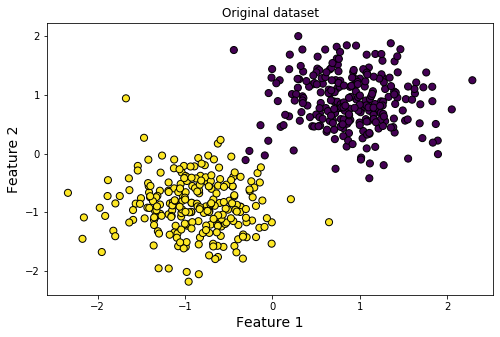

In [238]:
plt.figure(figsize=(8,5))    
plt.scatter(data_frame['x1'],data_frame['x2'],s=50,c=data_frame['y'], edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [239]:
Y.shape

(500,)

In [240]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [241]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

In [242]:
clf.fit(X_scaled)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

In [243]:
sim_mat = clf.transform()
print(sim_mat)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [244]:
def symmetrize(graph, method="avg"):
    """
    A function for forcing symmetry upon a graph.
    Parameters
    ----------
    graph: object
        Either array-like, (n_vertices, n_vertices) numpy matrix,
        or an object of type networkx.Graph.
    method: {'avg' (default), 'triu', 'tril',}, optional
        An option indicating which half of the edges to
        retain when symmetrizing. 
            - 'avg'
                Retain the average weight between the upper and lower 
                right triangle, of the adjacency matrix.
            - 'triu'
                Retain the upper right triangle.
            - 'tril'
                Retain the lower left triangle.
            
    Returns
    -------
    graph: array-like, shape (n_vertices, n_vertices)
        the graph with asymmetries removed.
    Examples
    --------
    >>> a = np.array([
    ...    [0, 1, 1], 
    ...    [0, 0, 1], 
    ...    [0, 0, 1]])
    >>> symmetrize(a, method="triu")
    array([[0, 1, 1],
           [1, 0, 1],
           [1, 1, 1]])
    """
    # graph = import_graph(graph)
    if method == "triu":
        graph = np.triu(graph)
    elif method == "tril":
        graph = np.tril(graph)
    elif method == "avg":
        graph = (np.triu(graph) + np.tril(graph)) / 2
    else:
        msg = "You have not passed a valid parameter for the method."
        raise ValueError(msg)
    # A = A + A' - diag(A)
    graph = graph + graph.T - np.diag(np.diag(graph))
    return graph

In [245]:
new_sim = symmetrize(sim_mat)
print(new_sim)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


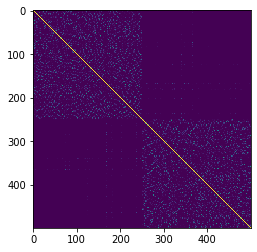

In [246]:
plt.imshow(sim_mat)

In [247]:
sym = (sim_mat + sim_mat.T)/2

In [248]:
sym - sym.T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

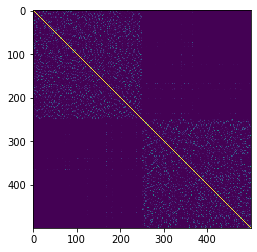

In [249]:
plt.imshow(sym)

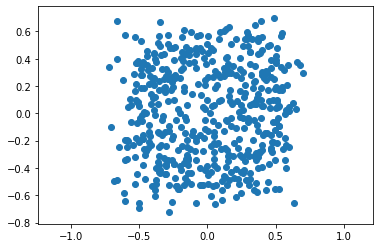

In [261]:
from sklearn.manifold import MDS

model = MDS(n_components=2, metric = False, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(sym)
plt.scatter(out[:, 0], out[:, 1])
plt.axis('equal');



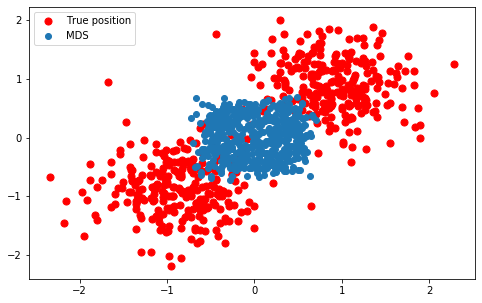

In [264]:
embedding = MDS(n_components=2, metric = False, dissimilarity='precomputed',random_state=1)

plt.figure(figsize=(8,5)) 
proj = embedding.fit_transform(sym)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='r', s=50)
plt.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','MDS'), loc='best')


In [265]:
proj

array([[ 0.27028152, -0.41704382],
       [-0.28750743,  0.5072728 ],
       [ 0.50560498, -0.06127774],
       [ 0.14732517, -0.26872048],
       [ 0.50904995,  0.09712141],
       [ 0.11105713, -0.49499204],
       [ 0.31921235,  0.27969879],
       [ 0.13880441,  0.40626127],
       [-0.31463933,  0.18691518],
       [-0.42462766,  0.21136307],
       [-0.4869654 ,  0.18174602],
       [ 0.00377805, -0.44941182],
       [ 0.28877473, -0.30061799],
       [ 0.40190474, -0.39469184],
       [ 0.37005241,  0.43611141],
       [-0.15599366,  0.48427724],
       [ 0.40755709, -0.15716973],
       [-0.1461745 , -0.24776855],
       [ 0.4716587 , -0.28632615],
       [ 0.48282015, -0.21320536],
       [ 0.43223047,  0.3104233 ],
       [-0.41518357,  0.07133557],
       [ 0.21140734, -0.10882857],
       [-0.4246514 , -0.13913258],
       [ 0.24627099, -0.42852517],
       [-0.46271071,  0.18445367],
       [-0.01914288, -0.05161213],
       [-0.11332011,  0.14261051],
       [ 0.35833228,

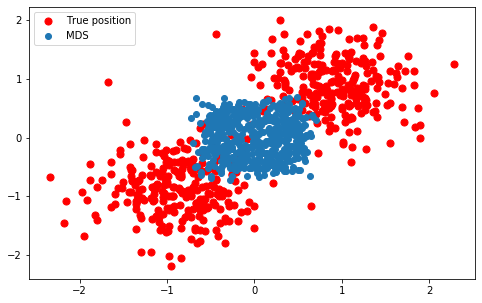

In [266]:
plt.figure(figsize=(8,5)) 
proj_1 = embedding.fit_transform(new_sim)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='r', s=50)
plt.scatter(proj_1[:, 0], proj_1[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','MDS'), loc='best')


In [267]:
proj_1

array([[ 0.27028152, -0.41704382],
       [-0.28750743,  0.5072728 ],
       [ 0.50560498, -0.06127774],
       [ 0.14732517, -0.26872048],
       [ 0.50904995,  0.09712141],
       [ 0.11105713, -0.49499204],
       [ 0.31921235,  0.27969879],
       [ 0.13880441,  0.40626127],
       [-0.31463933,  0.18691518],
       [-0.42462766,  0.21136307],
       [-0.4869654 ,  0.18174602],
       [ 0.00377805, -0.44941182],
       [ 0.28877473, -0.30061799],
       [ 0.40190474, -0.39469184],
       [ 0.37005241,  0.43611141],
       [-0.15599366,  0.48427724],
       [ 0.40755709, -0.15716973],
       [-0.1461745 , -0.24776855],
       [ 0.4716587 , -0.28632615],
       [ 0.48282015, -0.21320536],
       [ 0.43223047,  0.3104233 ],
       [-0.41518357,  0.07133557],
       [ 0.21140734, -0.10882857],
       [-0.4246514 , -0.13913258],
       [ 0.24627099, -0.42852517],
       [-0.46271071,  0.18445367],
       [-0.01914288, -0.05161213],
       [-0.11332011,  0.14261051],
       [ 0.35833228,

In [268]:
np.allclose(proj,proj_1)

True

In [270]:
np.allclose(proj, X_scaled)

False